# AMAZON REVIEW DATASET

In [27]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt

In [28]:
amazon = pd.read_csv(r"D:\denis\amazonreviews.tsv", sep='\t')

In [29]:
amazon.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [30]:
amazon.shape

(10000, 2)

In [31]:
amazon.label.value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

In [32]:
amazon.iloc[100][1] 

'textbook: Book shipped quickly and was in excellent condition as stated. Easy transaction would buy again'

In [33]:
amazon.label.replace({"neg":0,"pos":1},inplace = True)

In [34]:
amazon.head()

,label,review
0,1,Stuning even for the non-gamer: This sound tra...
1,1,The best soundtrack ever to anything.: I'm rea...
2,1,Amazing!: This soundtrack is my favorite music...
3,1,Excellent Soundtrack: I truly like this soundt...
4,1,"Remember, Pull Your Jaw Off The Floor After He..."


In [35]:
amazon.review = amazon.review.str.lower() ## Convert to lower case

In [36]:
from nltk.corpus import stopwords

In [37]:
import wordcloud
from wordcloud import WordCloud

In [38]:
cloud = WordCloud().generate(str(amazon['review']))

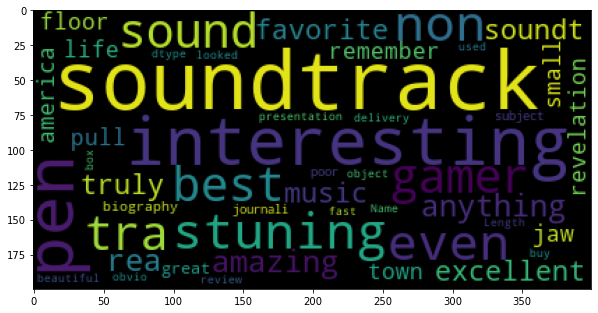

In [39]:
plt.figure(figsize = (10,10))
plt.imshow(cloud)

In [40]:
cloud = WordCloud(max_words=20,
stopwords=stopwords.words("english")).generate(str(amazon.review[amazon.label==0]))

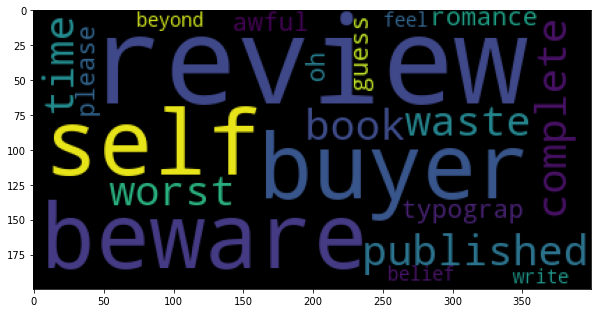

In [41]:
plt.figure(figsize = (10,10))
plt.imshow(cloud)

In [42]:
cloud = WordCloud(max_words=20,
stopwords=stopwords.words("english")).generate(str(amazon.review[amazon.label==1]))

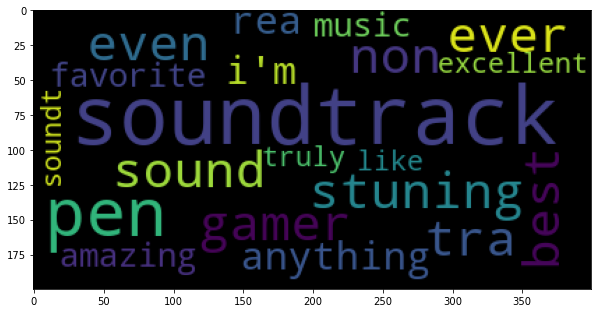

In [43]:
plt.figure(figsize = (10,10))
plt.imshow(cloud)

In [44]:
import string

In [45]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [46]:
def text_process(mess):                ## Create a function
    """                                # A docstring
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [word for word in nopunc.split()if word not in stopwords.words("english")]

In [47]:
amazon['review'].apply(text_process)

0       [stuning, even, nongamer, sound, track, beauti...
1       [best, soundtrack, ever, anything, im, reading...
2       [amazing, soundtrack, favorite, music, time, h...
3       [excellent, soundtrack, truly, like, soundtrac...
4       [remember, pull, jaw, floor, hearing, youve, p...
                              ...                        
9995    [revelation, life, small, town, america, early...
9996    [great, biography, interesting, journalist, bi...
9997    [interesting, subject, poor, presentation, you...
9998    [dont, buy, box, looked, used, obviously, new,...
9999    [beautiful, pen, fast, delivery, pen, shipped,...
Name: review, Length: 10000, dtype: object

In [48]:
from sklearn.feature_extraction.text import CountVectorizer #
bow_transformer = CountVectorizer(analyzer = text_process).fit(amazon["review"])

In [49]:
bow_transformer.vocabulary_

{'stuning': 34189,
 'even': 12595,
 'nongamer': 24278,
 'sound': 33125,
 'track': 36325,
 'beautiful': 3941,
 'paints': 25720,
 'senery': 31523,
 'mind': 22665,
 'well': 38818,
 'would': 39538,
 'recomend': 29102,
 'people': 26193,
 'hate': 16497,
 'vid': 38116,
 'game': 14941,
 'music': 23568,
 'played': 26823,
 'chrono': 6964,
 'cross': 8903,
 'games': 14971,
 'ever': 12608,
 'best': 4239,
 'backs': 3531,
 'away': 3391,
 'crude': 8936,
 'keyboarding': 19746,
 'takes': 34897,
 'fresher': 14581,
 'step': 33794,
 'grate': 15807,
 'guitars': 16080,
 'soulful': 33109,
 'orchestras': 25171,
 'impress': 17969,
 'anyone': 2530,
 'cares': 6094,
 'listen': 20917,
 'soundtrack': 33147,
 'anything': 2538,
 'im': 17820,
 'reading': 28886,
 'lot': 21215,
 'reviews': 30044,
 'saying': 30943,
 'figured': 13711,
 'id': 17672,
 'write': 39594,
 'review': 30033,
 'disagree': 10372,
 'bit': 4457,
 'opinino': 25096,
 'yasunori': 39747,
 'mitsudas': 22881,
 'ultimate': 37007,
 'masterpiece': 21946,
 'time

In [ ]:
#l1 = list(bow_transformer.vocabulary_)

In [53]:
len(bow_transformer.vocabulary_)

40040

In [54]:
amazon_bow = bow_transformer.transform(amazon.review)

In [55]:
amazon_bow.shape

(10000, 40040)

In [56]:
type(amazon_bow)

scipy.sparse.csr.csr_matrix

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(amazon_bow,amazon.label,test_size=.2)

# Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
dt=DecisionTreeClassifier(criterion="entropy",max_depth=4)

In [59]:
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)

tab_dt = confusion_matrix(pred_dt,y_test)
tab_dt

array([[969, 645],
       [ 99, 287]], dtype=int64)

In [60]:
Accuracy = tab_dt.diagonal().sum() / tab_dt.sum()*100
Accuracy

62.8

# Navive Bayes

In [61]:
from sklearn.naive_bayes import MultinomialNB

In [62]:
naive_bayes = MultinomialNB()

In [63]:
naive_bayes.fit(x_train, y_train)
pred_nb = naive_bayes.predict(x_test)

tab_nb = confusion_matrix(pred_nb,y_test)
tab_nb

array([[912, 149],
       [156, 783]], dtype=int64)

In [64]:
Accuracy = tab_nb.diagonal().sum() / tab_nb.sum()*100
Accuracy

84.75

## Sentiment Analysis

In [65]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()

In [66]:
abc = sent.polarity_scores(amazon.iloc[0][1])

In [67]:
abc.keys()

dict_keys(['neg', 'neu', 'pos', 'compound'])

In [68]:
abc['compound']

0.9454

In [69]:
score_com = []
score_pos = []
score_neg = []
for i in range(0,amazon.shape[0]):
    score = sent.polarity_scores(amazon.iloc[i][1])   # This [1] is for 2nd column
    score1 = score['compound']
    score_com.append(score1)
    # Below 2 lines to extract the positive sentiment 
    score2 = score['pos']
    score_pos.append(score2)
    # Below 2 lines to extract the negative sentiment 
    score2 = score['neg']
    score_neg.append(score2)

In [70]:
amazon["Comp-Score"]   = score_com # Adding the new column to the data frame 
amazon["Pos-Score"]    = score_pos
amazon["Neg-Score"]    = score_neg
amazon.head(20)

,label,review,Comp-Score,Pos-Score,Neg-Score
0,1,stuning even for the non-gamer: this sound tra...,0.9454,0.243,0.088
1,1,the best soundtrack ever to anything.: i'm rea...,0.8957,0.145,0.018
2,1,amazing!: this soundtrack is my favorite music...,0.9858,0.268,0.040
3,1,excellent soundtrack: i truly like this soundt...,0.9814,0.295,0.090
4,1,"remember, pull your jaw off the floor after he...",0.9781,0.254,0.000
5,1,an absolute masterpiece: i am quite sure any o...,0.9900,0.249,0.014
6,0,"buyer beware: this is a self-published book, a...",-0.8744,0.069,0.124
7,1,glorious story: i loved whisper of the wicked ...,0.9900,0.346,0.072
8,1,a five star book: i just finished reading whis...,0.8353,0.174,0.113
9,1,whispers of the wicked saints: this was a easy...,0.8196,0.190,0.033
